In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('ncharged')
    scalar.append('pt_jet')
    scalar.append('p_jet')
    scalar.append('eta_jet')
    scalar.append('pt_electron')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('x')
    scalar.append('y')
    scalar.append('xsec')
    scalar.append('ntrials')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
def plot(df_array):
    
    fig = plt.figure(figsize=(10,8))
    for index in range(len(df_array)):
        df = df_array[index]
        df = applyCut(df, '0.1 < y < 0.85', '0.1 < y < 0.85')
        df = applyCut(df, 'W2 > 4', 'W2 > 4')
        dfs = partitionEtaPt(df, etaedges, ptedges)
        for i in range(len(etaedges)-1):
            x = []*(len(ptedges)-1)
            yc = []*(len(ptedges)-1)
            ycerr = []*(len(ptedges)-1)
            for j in range(len(ptedges)-1):
                d = dfs[i][j]
                x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
                xerr = getInterval(ptedges)/2
                yc.append(np.mean(d['ncharged']))
                ycerr.append(np.std(d['ncharged']/2))
            plt.errorbar(x, yc, xerr = xerr, yerr = ycerr, color=colors[index], elinewidth=1, label=labels[index])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
    plt.ylabel('Number of Charged Constituents', fontsize=15)
    plt.legend(prop={'size': 15}, frameon=False, loc='upper left')

In [8]:
files=['$HOME/EIC/output/1120_2.root','$HOME/EIC/output/117.root','$HOME/EIC/output/1120.root']
etaedges = [-4.5, 4.5]
ptedges = toArrayFloat(0, 1.55, 0, log=True, logNum=13)
colors = ['g','r','b']
labels = ['$ p_T^{part} > 100 MeV $' ,'$ p_T^{part} > 250 MeV $', '$ p_T^{part} > 500 MeV $']

In [9]:
a = getData([files[0]])
b = getData([files[1]])
c = getData([files[2]])

Processed $HOME/EIC/output/1120_2.root in 66.2242369652 seconds
Processed $HOME/EIC/output/117.root in 43.2234640121 seconds
Processed $HOME/EIC/output/1120.root in 24.5260720253 seconds


0.1 < y < 0.85 8894228  fraction kept: 19.0
W2 > 4 8894228  fraction kept: 100.0

-4.5 < eta_jet < 4.5 

-4.5 < eta_jet < 4.5 8894228  fraction kept: 100.0
1.0 < pt_jet < 1.3463769461724673 691531  fraction kept: 7.8
1.3463769461724673 < pt_jet < 1.812730881184699 471781  fraction kept: 5.3
1.812730881184699 < pt_jet < 2.440619068041981 352223  fraction kept: 4.0
2.440619068041981 < pt_jet < 3.285993247600655 273994  fraction kept: 3.1
3.285993247600655 < pt_jet < 4.424185553847917 189154  fraction kept: 2.1
4.424185553847917 < pt_jet < 5.956621435290106 113892  fraction kept: 1.3
5.956621435290106 < pt_jet < 8.019857777551351 62331  fraction kept: 0.7
8.019857777551351 < pt_jet < 10.7977516232771 30812  fraction kept: 0.3
10.7977516232771 < pt_jet < 14.537843856076622 13644  fraction kept: 0.2
14.537843856076622 < pt_jet < 19.573417814876606 5169  fraction kept: 0.1
19.573417814876606 < pt_jet < 26.353198503751333 1380  fraction kept: 0.0
26.353198503751333 < pt_jet < 35.4813389233575

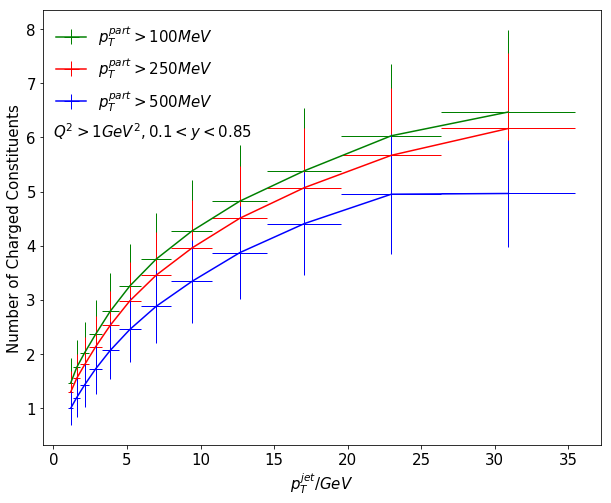

In [10]:
plot([a,b,c])    
plt.text(0,6,'$ Q^2 > 1 GeV^2, 0.1 < y < 0.85 $', fontsize=15)
plt.savefig('images/number_charged.pdf', bbox_inches='tight')